In [ ]:
import pandas as pd 
import openpyxl as opxl
data = pd.read_excel('Mrbeast_data.xlsx') 
data.head()
data['Views'] = data['Views'].str.replace(" views","") 
  
new = [] 
  
for i in data['Views']: 
    if(i.endswith('K')): 
        i = i.replace('K','') 
        new.append(float(i) * 1000) 
    elif(i.endswith('M')):
        i = i.replace('M' , '')
        new.append(float(i) * (10**9))
    else : 
        new.append(float(i)) 
  
data['Views'] = new

In [3]:
# Nettoyage de la colonne de la durée 
data['Duration'] = data['Duration'].str.replace("\n","") 

new2 = [] 

for i in data['Duration']: 
	if(i=='SHORTS' or len(i.split(':'))==1): 
		new2.append(i) 
	elif(len(i.split(':'))==2): 
		i = i.split(':') 
		tim = int(i[0])*60 + int(i[1]) 
		new2.append(tim) 
	elif(len(i.split(':'))==3): 
		i = i.split(':') 
		tim = int(i[0])*3600 + int(i[1])*60 + int(i[2]) 
		new2.append(tim) 
		
data['Duration'] = new2


In [ ]:

# Catégorisation de la colonne 'Durée' ( "court" et "longue"  et "trés longue" video)
for i in data['Duration'].index: 
    val = data['Duration'].iloc[i] 

    if val in range(0,60) :
        data.loc[i , 'Duration'] = 'SHORTS'
    if(val in range(60,300)): 
        data.loc[i,'Duration'] = 'court'
    elif(val in range(300,1200)): 
        data.loc[i,'Duration'] = 'longue'
    else: 
        data.loc[i,'Duration'] = 'trés_longue'

In [5]:
print(data)


                                             Title         Views     Duration
0               $1 vs $250,000,000 Private Island!  1.040000e+11       longue
1                        Protect $500,000 Keep It!  1.040000e+11       longue
2           I Spent 7 Days In Solitary Confinement  1.200000e+11  trés_longue
3                    I Rescued 100 Abandoned Dogs!  1.170000e+11       longue
4           Survive 100 Days Trapped, Win $500,000  1.670000e+11  trés_longue
..                                             ...           ...          ...
265    Donating $10,000 To Random Twitch Streamers  1.000000e+10       longue
266                               Breaking The Law  3.100000e+10        court
267  Giving Homeless People $1,000 (Not Clickbait)  6.500000e+09       longue
268                We Are Better Than Dude Perfect  2.500000e+10        court
269                 Every Challenge I've Ever Done  8.900000e+05  trés_longue

[270 rows x 3 columns]


In [ ]:
# Traitement de text 

import re 
from tqdm import tqdm 
import nltk 
nltk.download('punkt') 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer

In [7]:
print(data)

                                             Title         Views     Duration
0               $1 vs $250,000,000 Private Island!  1.040000e+11       longue
1                        Protect $500,000 Keep It!  1.040000e+11       longue
2           I Spent 7 Days In Solitary Confinement  1.200000e+11  trés_longue
3                    I Rescued 100 Abandoned Dogs!  1.170000e+11       longue
4           Survive 100 Days Trapped, Win $500,000  1.670000e+11  trés_longue
..                                             ...           ...          ...
265    Donating $10,000 To Random Twitch Streamers  1.000000e+10       longue
266                               Breaking The Law  3.100000e+10        court
267  Giving Homeless People $1,000 (Not Clickbait)  6.500000e+09       longue
268                We Are Better Than Dude Perfect  2.500000e+10        court
269                 Every Challenge I've Ever Done  8.900000e+05  trés_longue

[270 rows x 3 columns]


In [8]:
def preprocess_text(text_data): 
    preprocessed_text = [] 
      
    for sentence in tqdm(text_data): 
        sentence = re.sub(r'[^\w\s]', '', sentence)
        sentence = re.sub(r'\d' , '' , sentence) 
        preprocessed_text.append(' '.join(token.lower() 
                                  for token in str(sentence).split() 
                                  if token not in stopwords.words('english'))) 
  
    return preprocessed_text 
    

In [ ]:
preprocessed_review = preprocess_text(data['Title'].values) 
data['Title'] = preprocessed_review

In [10]:
#Visualisation des données
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

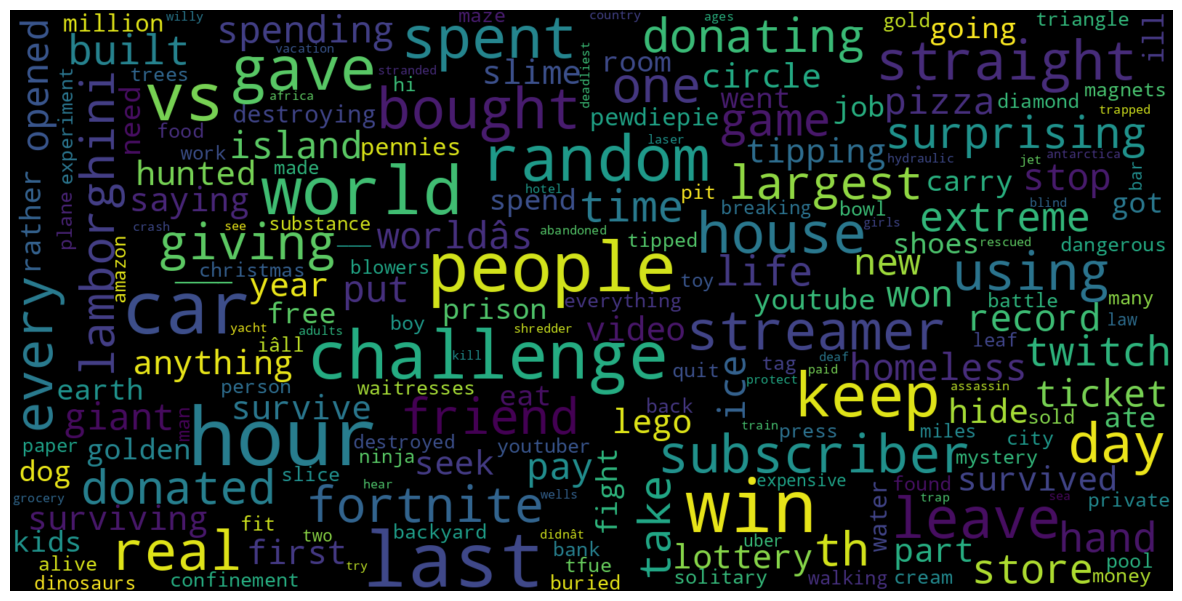

In [11]:
consolidated = ' '.join(word for word in data['Title'].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, random_state=21, 
                      max_font_size=110, collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

<Axes: xlabel='Duration', ylabel='count'>

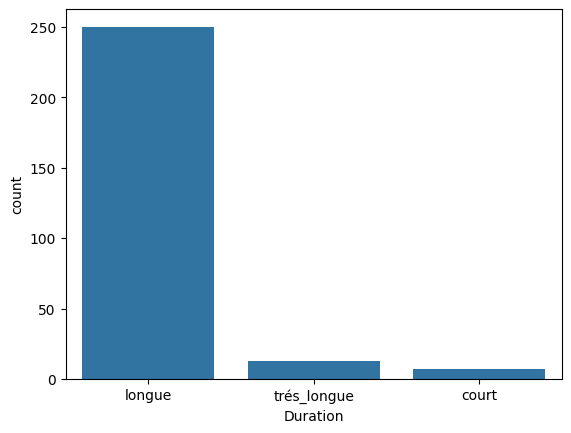

In [18]:
sns.countplot(data=data, x='Duration', orient='v')
